In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# It kept truncating my stuff and I found this to fix it
pd.set_option('display.max_columns', None)

In [ ]:
ibm = pd.read_csv('IBMDataset.csv')

ibm.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

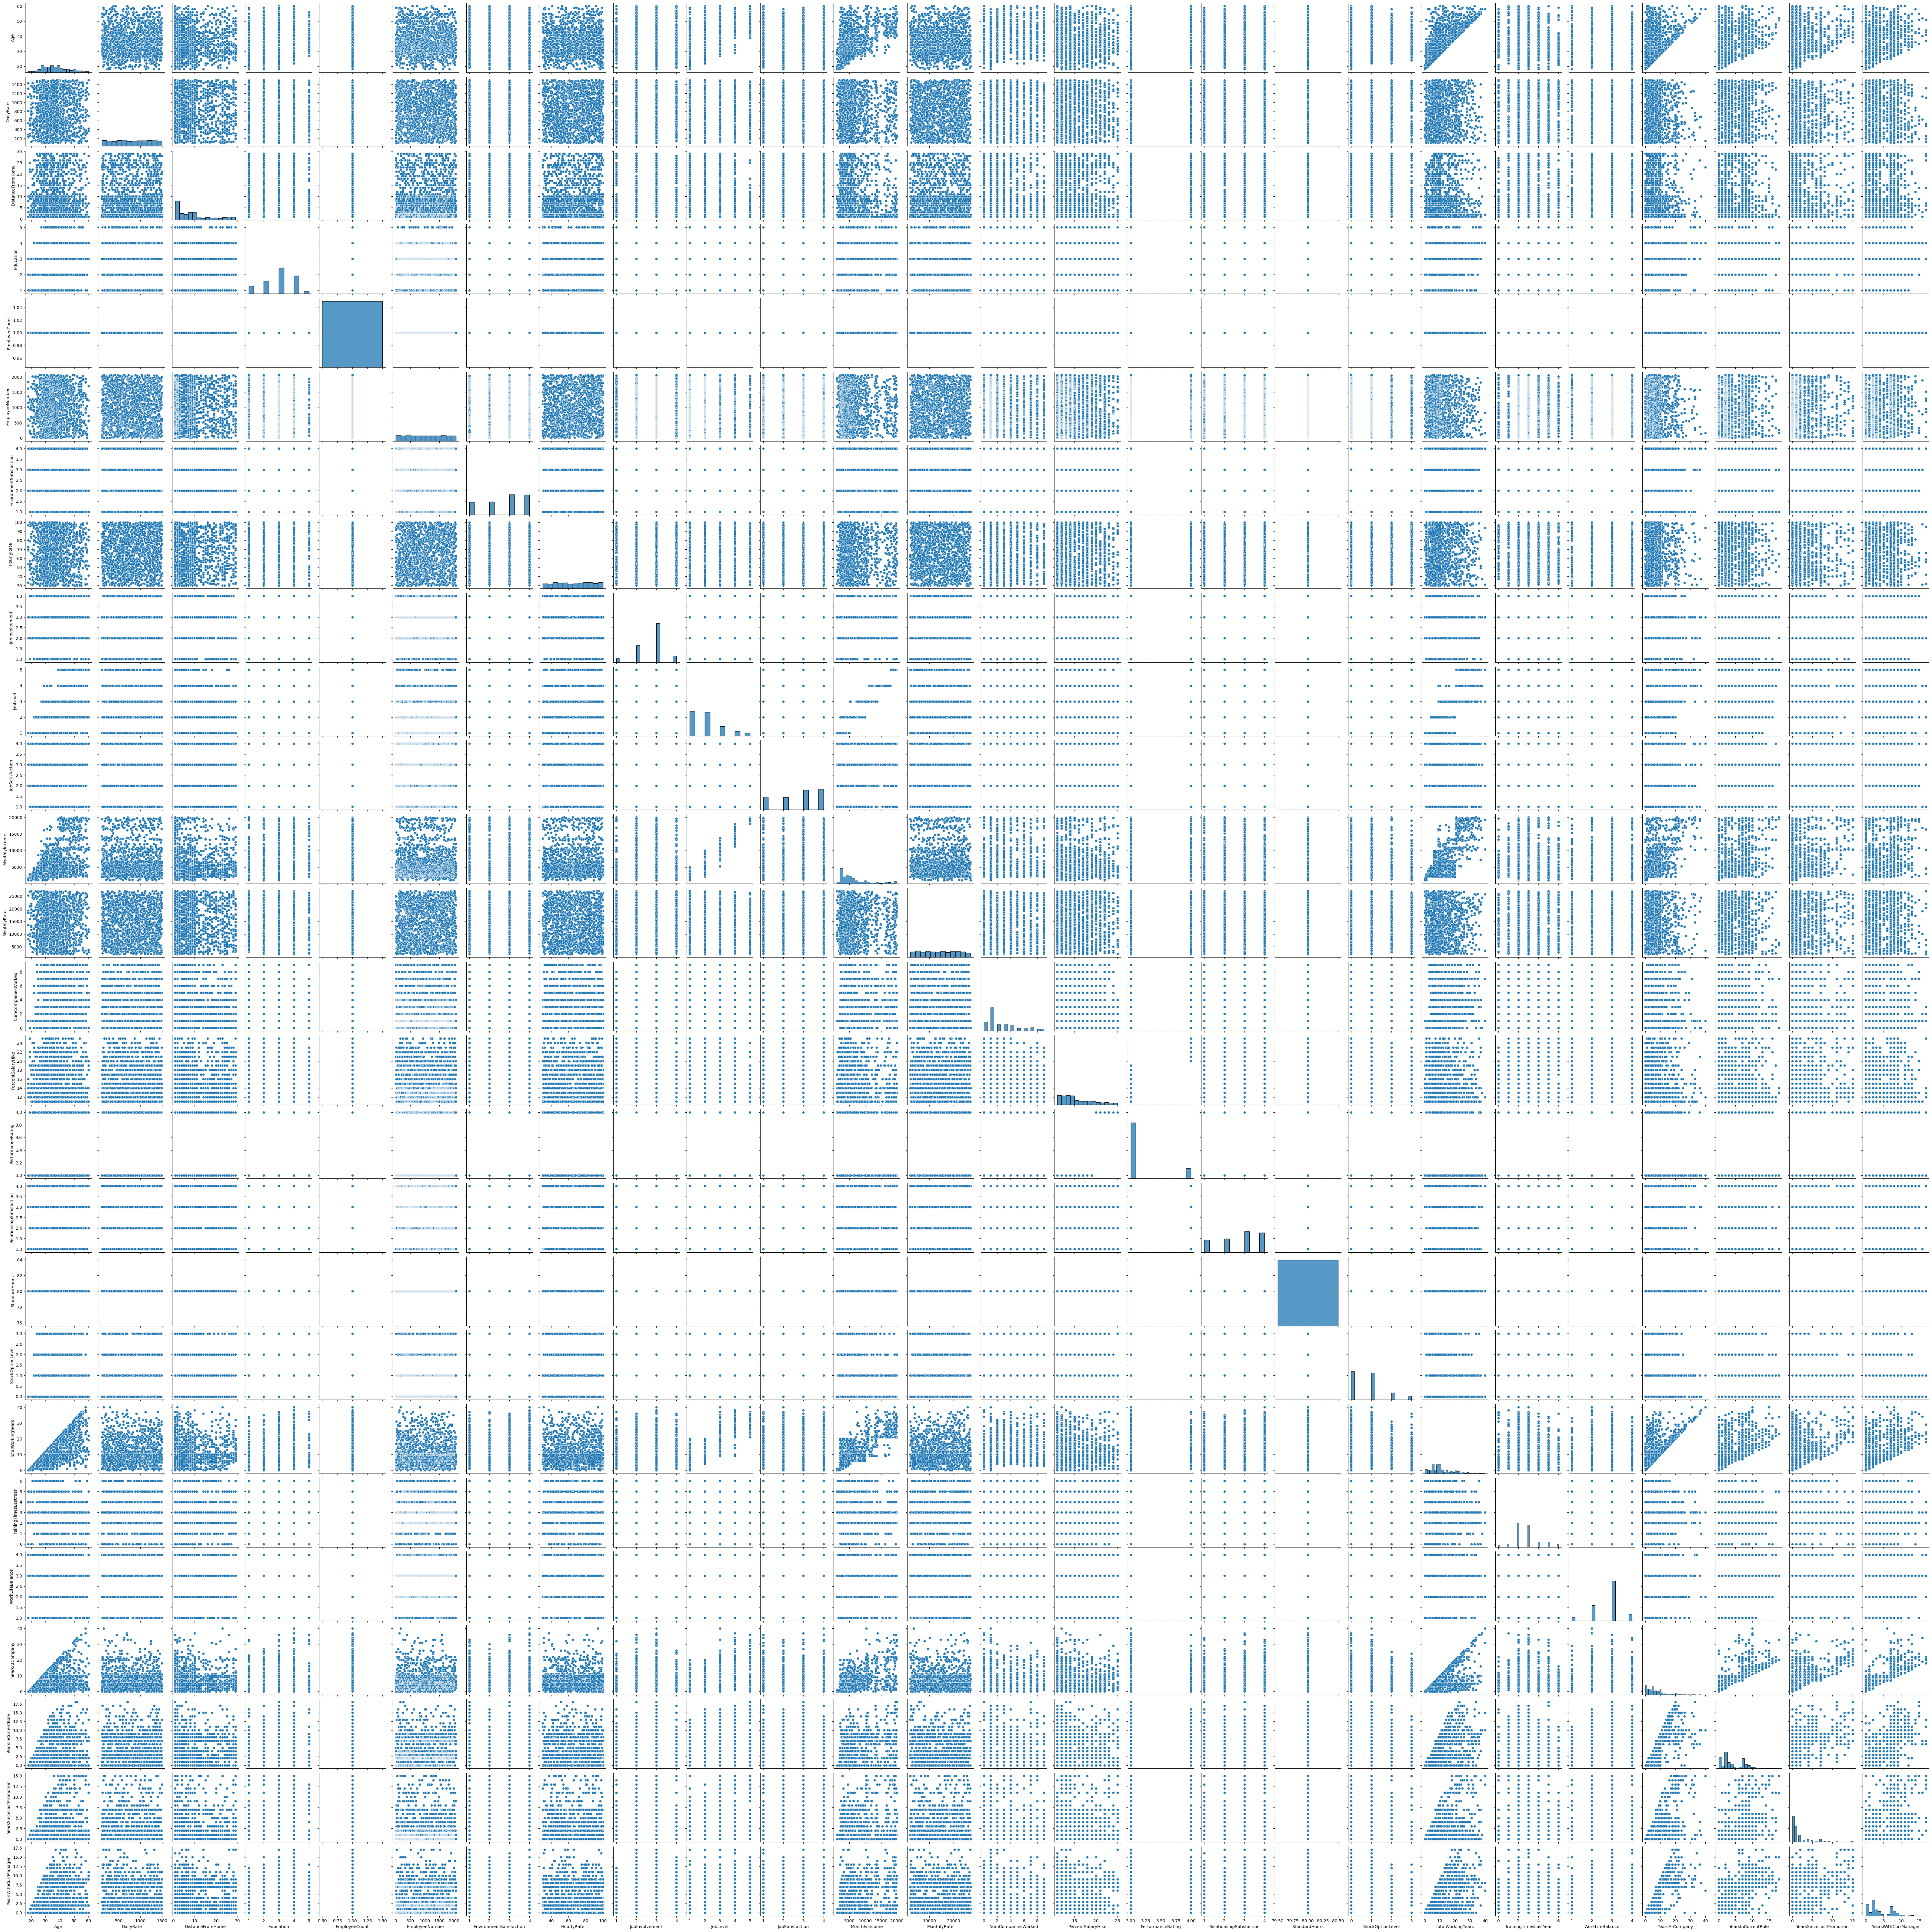

In [ ]:
# Found pairplot to quickly viz data (Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html)
sns.pairplot(ibm)
plt.show()

# There are some vars which should probably be categorical (but I am not focused on them given my model)

In [ ]:
# Checking for data issues
ibm.describe()

In [ ]:
# Checking for NaN (Source: https://www.geeksforgeeks.org/check-for-nan-in-pandas-dataframe/#)
print(ibm.isnull().sum()) 

# no Null values found

In [ ]:
ibm.dtypes # Checking types: https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe

In [ ]:
# Checking the number columns to see what I could use for a linear regression
ibm.select_dtypes(include=['int64']).describe()

In [ ]:
selected_columns = ["MonthlyIncome", "TotalWorkingYears", "NumCompaniesWorked", "YearsAtCompany", "DistanceFromHome", "Age", "YearsSinceLastPromotion", "YearsWithCurrManager"]
ibm_exploratory = ibm[selected_columns]
sns.pairplot(ibm_exploratory)

# The strongest (really the only) possible linear regression would be between TotalWorkingYears and Monthly income, which makes sense.
# Other than that, the only other thing that I think is interesting is total working years and years with current manager also seems positive.
# Suggesting that maybe the longer you work the more you just want to stay in one team.

In [ ]:
# These are the 6 problems described in the book:
# 1. Non-linearity of the response-predictor relationships.
# 2. Correlation of error terms.
# 3. Non-constant variance of error terms.
# 4. Outliers.
# 5. High-leverage points.
# 6. Collinearity.


# My research question is: How is monthly income tied to total working years? How can I use this information to predict how much I will be earning in 5, 10, 15 years?
# I will check them one by one:
# 1. Linearity - The releationship looks pretty linear, although there are 2 clusters for some reason, which I am not sure as to why since both columns are continuous.

model_columns = ["MonthlyIncome", "TotalWorkingYears"]
ibm_final = ibm[model_columns]
sns.pairplot(ibm_final)

In [ ]:
# 4. Outliers
ibm_final.describe()

# From the summary statistics and the plots above it is fair to say that there are no outliers in the columns (given histogram shape and min/max)
# This is also true for high leverage (5.) points based on the scatterplot.
# The rest of the problems rely on the residual plot, which I can only get after fitting the linear regression, so I will check in the other notebook.

### Summary
After going through the data I have found 2 quantitative columns of interest for my linear regression (I am hoping do classification for final project) being the Monthly Income and Total Working Years columns. Neither have outliers or high leverage points present. In addition, their relation is linear and the error checks out (check the other notebook/pdf where I analyze this). As such, I found the dataset appropriate to perform linear regression, which is done in the other notebook.